# 载入作业所需函数库

In [104]:
#coding=utf-8  
import numpy as np
import pandas as pd
import csv
from scipy import linalg
import matplotlib.pyplot as plt                       #导入快速绘图包函数
import seaborn as sns
import os
import re
import requests
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm,chi2
from bs4 import BeautifulSoup

# 一、Part1 Of Lab2
$~~~~~~~~~~~~~~~~~~$
$~~~~~~~~~~~~~~~~~~$
<font color=red size=3 face="黑体">part1实验要求：</font>
 + 生成两个随机分布，一个为正态分布<font color=orange size=2 face="黑体">$\mathit{X\sim N\left ( \mu ,\sigma ^{2} \right )}$ </font>，另一个为卡方分布<font color=orange size=2 face="黑体">$X\sim \chi ^{2}\left ( k \right )$ </font>
 + 写出两个分布的对数似然函数
 + 极大化对数似然函数，得到两个分布的参数，与真实值进行比较

### 1.1生成正态分布和卡方分布随机数

In [87]:
#生成正态分布随机数 均值为32，标准差为100，2000个随机数
np.random.seed(20180325)
X = np.random.normal(32,100,2000)

In [93]:
#生成卡方分布随机数 自由度为7，2000个随机数
np.random.seed(20180325)
Y = np.random.chisquare(7 ,2000)

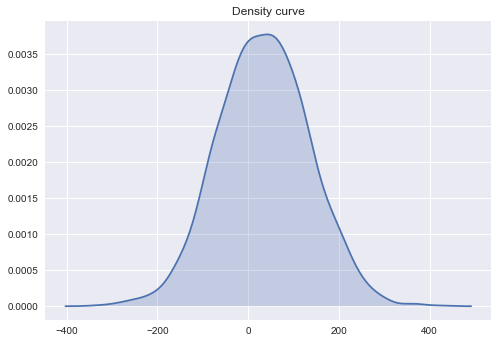

In [106]:
#画出正态分布密度曲线
X=pd.Series(X)
sns.kdeplot(X,shade=True)                      
plt.title('Density curve') 
plt.show()

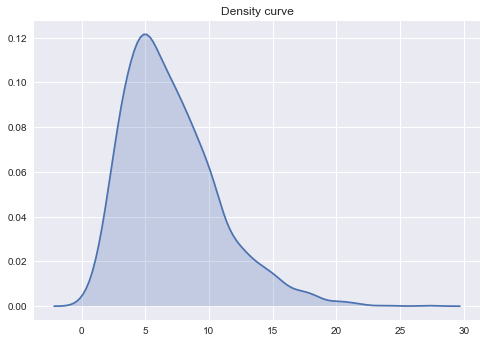

In [107]:
#画出卡方分布密度曲线
Y=pd.Series(Y)
sns.kdeplot(Y,shade=True)                      
plt.title('Density curve') 
plt.show()

### 1.2定义对数似然函数

In [88]:
#定义对数极大似然函数 theta为列表，其中包含均值和方差
def loglikelyhood(theta,X=X):
    return -sum(norm.logpdf(X,theta[0],theta[1]))

In [98]:
#定义对数极大似然函数 df为自由度
def loglikelyhood1(df,X=Y):
    return -sum(chi2.pdf(X,df))

### 1.3极大化对数似然函数，估计分布参数
$~~~~~~~$利用scipy.optimize函数中的minimize函数，极大化对数似然函数，并且设置theta的初始值为[0,1]，利用Nelder-Mead单纯性算法进行优化

In [91]:
theta0=[0,1]
#最小化负的对数极大似然函数，即最大化对数极大似然函数，得到使得对数极大似然函数最大的theta
res = minimize(loglikelyhood,theta0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 12053.610430
         Iterations: 114
         Function evaluations: 238
[ 34.60363162 100.27001723]


In [100]:
theta1=[1]
res = minimize(loglikelyhood1,theta1, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: -174.012352
         Iterations: 36
         Function evaluations: 77
[6.10823202]


# 二、Part2 Of Lab2


$~~~~~~~$爬取新闻文本，把有间断语义的标点作为分割符，划分语句。把每句话都放入csv的每一个单元格里，并对每一个语句进行其它标点，数字，英文、制表符的删除，实现完整的汉字文本。使得每个格子里都是完整语义的表达（也就是说，顿号逗号虽然要去掉，但完整的一句还是放同一个格子里）

### 2.1利用爬虫爬取QQ新闻数据
![](./QQnews1.jpg)

In [10]:
result = requests.get("http://new.qq.com/omn/20180324/20180324A0UVEL.html")  #根据所选的url来实例化一个result
soup=BeautifulSoup(result.content,'html.parser')   

In [41]:
####title
span1 = soup.find_all('div', class_='LEFT') 
title = span1[0].find('h1').get_text()
print(title)

男子脚穿“逆天改命”鞋飞车抢夺 不到9小时就落网


In [53]:
####text
span2 = soup.find_all('p', class_='one-p') 
del span2[0:2]
span2 = [item.get_text() for item in span2 ]
str = "\n"
text = str.join( span2 )
text = re.sub('\u3000', '', text)
print(text)

封面新闻讯（沈智 记者 徐湘东）3月22日晚11点过，在西昌市城区一酒吧内，3名年轻小伙正喝得高兴，几名民警突然而至，将他们全部戴上了手铐。就在8个多小时前，3人涉嫌骑摩托车飞车抢夺挎包。令人惊讶的是，其中一人穿着一双“逆天改命”的鞋子，想要以此改变自己的命运。
3月22日下午2点半，在西昌市姜坡路口发生一起飞车抢夺案件。嫌疑人驾驶一辆红色无牌摩托车，从一名女子身上抢走了一个挎包，包内有现金1000多元，一部苹果手机和一部oppo手机。

接到报警后，西昌警方全力侦查，很快就锁定了嫌疑人。当天晚上11点过，在西昌市大成一家酒吧内，涉嫌抢夺的三名犯罪嫌疑人被全部抓获，赃物被追回。
经初步审查，三人交代，他们在外省多次作案，这次刚到西昌作案，没想到还没过夜就被抓住了。
在审讯中，民警发现，其中一名嫌疑人脚上穿着一双绣有字的布鞋，左脚上书“逆天”，右脚写着“改命”。嫌疑人原想通过此鞋改变自己的运势，不想却将自己送进了看守所。审讯中民警告诉他：鞋不能改命，要改心、改作为才行得通。目前，三人已被刑拘。


In [54]:
#写出txt文件
with open("QQ新闻文本.txt","w") as f:
    f.write(title+"。"+"\n")
    for line in text:
        f.write(line)

### 2.2读取QQ新闻数据，进行文本处理

In [55]:
#读取QQ新闻文本进行文本处理
f = open("QQ新闻文本.txt")
text = f.readlines()
f.close()

In [56]:
text

['男子脚穿“逆天改命”鞋飞车抢夺 不到9小时就落网。\n',
 '封面新闻讯（沈智 记者 徐湘东）3月22日晚11点过，在西昌市城区一酒吧内，3名年轻小伙正喝得高兴，几名民警突然而至，将他们全部戴上了手铐。就在8个多小时前，3人涉嫌骑摩托车飞车抢夺挎包。令人惊讶的是，其中一人穿着一双“逆天改命”的鞋子，想要以此改变自己的命运。\n',
 '3月22日下午2点半，在西昌市姜坡路口发生一起飞车抢夺案件。嫌疑人驾驶一辆红色无牌摩托车，从一名女子身上抢走了一个挎包，包内有现金1000多元，一部苹果手机和一部oppo手机。\n',
 '\n',
 '接到报警后，西昌警方全力侦查，很快就锁定了嫌疑人。当天晚上11点过，在西昌市大成一家酒吧内，涉嫌抢夺的三名犯罪嫌疑人被全部抓获，赃物被追回。\n',
 '经初步审查，三人交代，他们在外省多次作案，这次刚到西昌作案，没想到还没过夜就被抓住了。\n',
 '在审讯中，民警发现，其中一名嫌疑人脚上穿着一双绣有字的布鞋，左脚上书“逆天”，右脚写着“改命”。嫌疑人原想通过此鞋改变自己的运势，不想却将自己送进了看守所。审讯中民警告诉他：鞋不能改命，要改心、改作为才行得通。目前，三人已被刑拘。']

In [58]:
#去掉只有\n的空行
text = [line for line in text if line not in ["\n"]] 
text

['男子脚穿“逆天改命”鞋飞车抢夺 不到9小时就落网。\n',
 '封面新闻讯（沈智 记者 徐湘东）3月22日晚11点过，在西昌市城区一酒吧内，3名年轻小伙正喝得高兴，几名民警突然而至，将他们全部戴上了手铐。就在8个多小时前，3人涉嫌骑摩托车飞车抢夺挎包。令人惊讶的是，其中一人穿着一双“逆天改命”的鞋子，想要以此改变自己的命运。\n',
 '3月22日下午2点半，在西昌市姜坡路口发生一起飞车抢夺案件。嫌疑人驾驶一辆红色无牌摩托车，从一名女子身上抢走了一个挎包，包内有现金1000多元，一部苹果手机和一部oppo手机。\n',
 '接到报警后，西昌警方全力侦查，很快就锁定了嫌疑人。当天晚上11点过，在西昌市大成一家酒吧内，涉嫌抢夺的三名犯罪嫌疑人被全部抓获，赃物被追回。\n',
 '经初步审查，三人交代，他们在外省多次作案，这次刚到西昌作案，没想到还没过夜就被抓住了。\n',
 '在审讯中，民警发现，其中一名嫌疑人脚上穿着一双绣有字的布鞋，左脚上书“逆天”，右脚写着“改命”。嫌疑人原想通过此鞋改变自己的运势，不想却将自己送进了看守所。审讯中民警告诉他：鞋不能改命，要改心、改作为才行得通。目前，三人已被刑拘。']

In [62]:
#按照句号，感叹号，问号等标点符号分隔，去掉\n\t\s等空白符以及制表符,最终得到句子
sentences = [sentence for line in text for sentence in re.split(r"[。！?]",line)]
sentences = [item for item in sentences if item not in ["\n",""]] 
sentences

['男子脚穿“逆天改命”鞋飞车抢夺 不到9小时就落网',
 '封面新闻讯（沈智 记者 徐湘东）3月22日晚11点过，在西昌市城区一酒吧内，3名年轻小伙正喝得高兴，几名民警突然而至，将他们全部戴上了手铐',
 '就在8个多小时前，3人涉嫌骑摩托车飞车抢夺挎包',
 '令人惊讶的是，其中一人穿着一双“逆天改命”的鞋子，想要以此改变自己的命运',
 '3月22日下午2点半，在西昌市姜坡路口发生一起飞车抢夺案件',
 '嫌疑人驾驶一辆红色无牌摩托车，从一名女子身上抢走了一个挎包，包内有现金1000多元，一部苹果手机和一部oppo手机',
 '接到报警后，西昌警方全力侦查，很快就锁定了嫌疑人',
 '当天晚上11点过，在西昌市大成一家酒吧内，涉嫌抢夺的三名犯罪嫌疑人被全部抓获，赃物被追回',
 '经初步审查，三人交代，他们在外省多次作案，这次刚到西昌作案，没想到还没过夜就被抓住了',
 '在审讯中，民警发现，其中一名嫌疑人脚上穿着一双绣有字的布鞋，左脚上书“逆天”，右脚写着“改命”',
 '嫌疑人原想通过此鞋改变自己的运势，不想却将自己送进了看守所',
 '审讯中民警告诉他：鞋不能改命，要改心、改作为才行得通',
 '目前，三人已被刑拘']

In [70]:
#python正则表达式去除标点符号、数字
#去除顿号、逗号、冒号、分号、以及空格等其他非断句标点符号
#去除数字英文字母
sentences1 = [re.sub(r"[，、：；\s+]","", line.encode("utf-8").decode("utf-8")) for line in sentences]   
# flags=re.I为不区分大小写
result = [re.sub(r"[\n\da-z+（）“”.]","",line,flags=re.I) for line in sentences1] 

In [71]:
result

['男子脚穿逆天改命鞋飞车抢夺不到小时就落网',
 '封面新闻讯沈智记者徐湘东月日晚点过在西昌市城区一酒吧内名年轻小伙正喝得高兴几名民警突然而至将他们全部戴上了手铐',
 '就在个多小时前人涉嫌骑摩托车飞车抢夺挎包',
 '令人惊讶的是其中一人穿着一双逆天改命的鞋子想要以此改变自己的命运',
 '月日下午点半在西昌市姜坡路口发生一起飞车抢夺案件',
 '嫌疑人驾驶一辆红色无牌摩托车从一名女子身上抢走了一个挎包包内有现金多元一部苹果手机和一部手机',
 '接到报警后西昌警方全力侦查很快就锁定了嫌疑人',
 '当天晚上点过在西昌市大成一家酒吧内涉嫌抢夺的三名犯罪嫌疑人被全部抓获赃物被追回',
 '经初步审查三人交代他们在外省多次作案这次刚到西昌作案没想到还没过夜就被抓住了',
 '在审讯中民警发现其中一名嫌疑人脚上穿着一双绣有字的布鞋左脚上书逆天右脚写着改命',
 '嫌疑人原想通过此鞋改变自己的运势不想却将自己送进了看守所',
 '审讯中民警告诉他鞋不能改命要改心改作为才行得通',
 '目前三人已被刑拘']

### 2.3写出csv文件
$~~~~~~~$将每一句完整的话都输出到csv表格中的一个空格中,并且添加newlines解决写入过程中出现空白行的问题

In [85]:
#写入csv文件
with open('QQ新闻文本预处理.csv','w',newline='') as csvfile:
    writer = csv.writer(csvfile)
    for line in result:
        writer.writerow([line])